# Advertising Sales Channel Prediction

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
# Checking the shape the dataset
df.shape

(200, 5)

1- Our dataset have 200 rows and 5 columns including Traget column

2-Sales is our target attribute.

3- This is a regression problem statement.

In [5]:
# Checking datatype of dataset
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

1- All the attributes have a numeric datatype.

2- Our datatype of all attributes is ok

In [6]:
# Checking info for our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


1- from above observation we can see that there is no null values present in our dataset.

2- Unnamed:0 column is a kind of index column we can drop in next step

In [7]:
# Checking null values
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

 1- There is no null values present in our dataset.

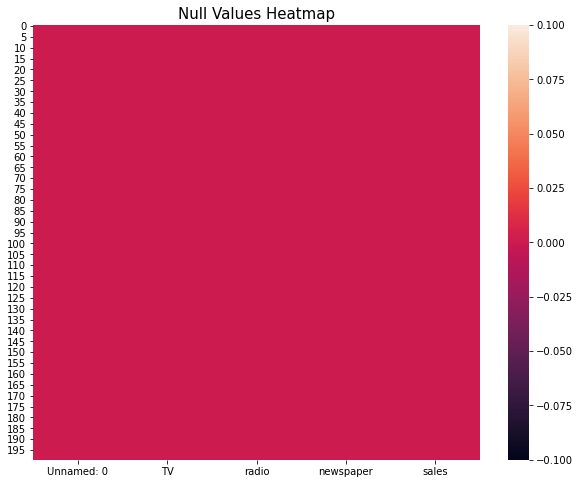

In [8]:
# Plotting Null values on heatmap
plt.figure(figsize=(10,8))
plt.title('Null Values Heatmap',fontsize=15)
sns.heatmap(df.isnull())
plt.show()

# Statistics 

In [9]:
# statistical Summary
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Observation

1- Our dataset seems to be normally distributed because mean and median values are nearly close to each other.

2-There could be some outliers present in newspaper column because there is a compartively high difference between 3rd quantile and max values.

3- Radio attribute has a minimum zero value in our dataset which could be part of further investigation in our dataset.

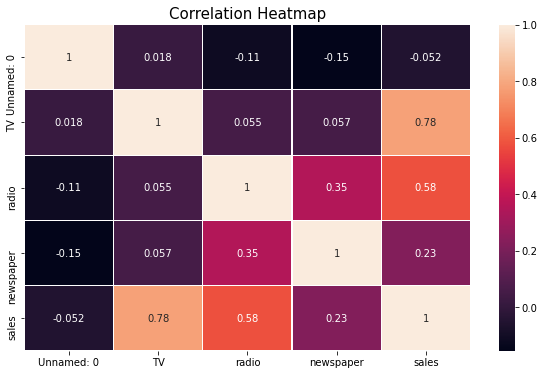

In [10]:
## Correlation Plot
plt.figure(figsize=(10,6))
plt.title('Correlation Heatmap',fontsize=15)
sns.heatmap(df.corr(),annot=True,linewidths=.2)
plt.show()

In [11]:
# Correlation with target attribute
df.corr()['sales'].sort_values(ascending=False)

sales         1.000000
TV            0.782224
radio         0.576223
newspaper     0.228299
Unnamed: 0   -0.051616
Name: sales, dtype: float64

1-Unnamed:0 have least and negative correlation with our target attribute.

2- TV and radio has a strong and positive correlation with targer attribute

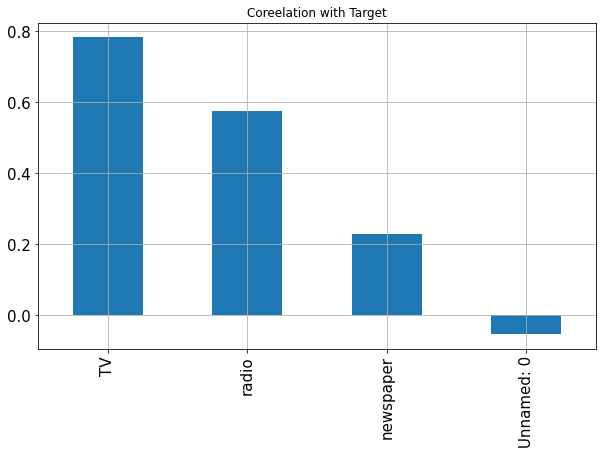

In [12]:
df.corr()['sales'].sort_values(ascending=False).drop(['sales']).plot.bar(figsize=(10,6),grid=True,title='Coreelation with Target',fontsize=15)
plt.show()


observation:

1- TV, Radio have correlation more that 50% with target variable.

2- Unnnamed:0 has negative and very weak correlation with our target variable, we can drop as it has no significance with target variable.

# EDA

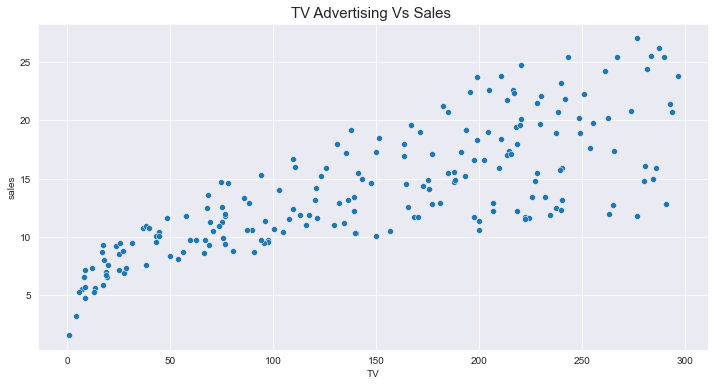

In [13]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
plt.title('TV Advertising Vs Sales ',fontsize=15)
sns.scatterplot(df['TV'],df['sales'],data=df)
plt.show()

1- There is a linear positive correlation between TV advertising and Sales.

2- As Tv advertising inceases sales also increases.

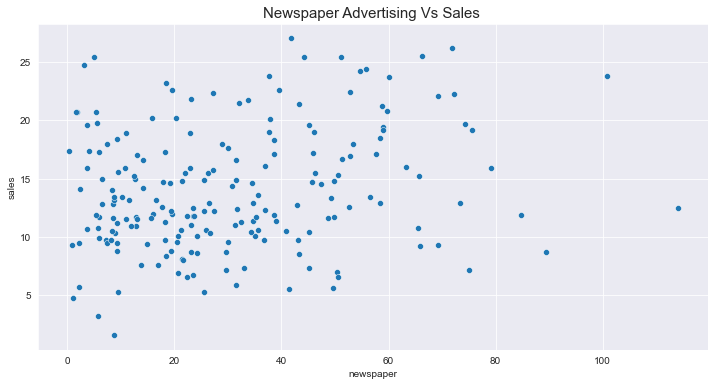

In [14]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
plt.title('Newspaper Advertising Vs Sales ',fontsize=15)
sns.scatterplot(df['newspaper'],df['sales'],data=df)
plt.show()


Observation

1- from above scatter plot we can see that there is a moderate realtionship with sales.

2- Datapoints are scattered we can't conclude from this plot

3-Some points are widly scattered.

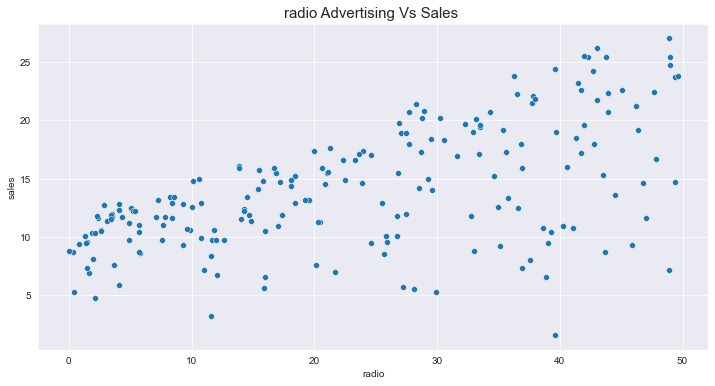

In [15]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
plt.title('radio Advertising Vs Sales ',fontsize=15)
sns.scatterplot(df['radio'],df['sales'],data=df)
plt.show()


Observation

1- This plot shows a positive linear relation between radio advertising and sales.

2- As radio advertising increases, sales also get increases.

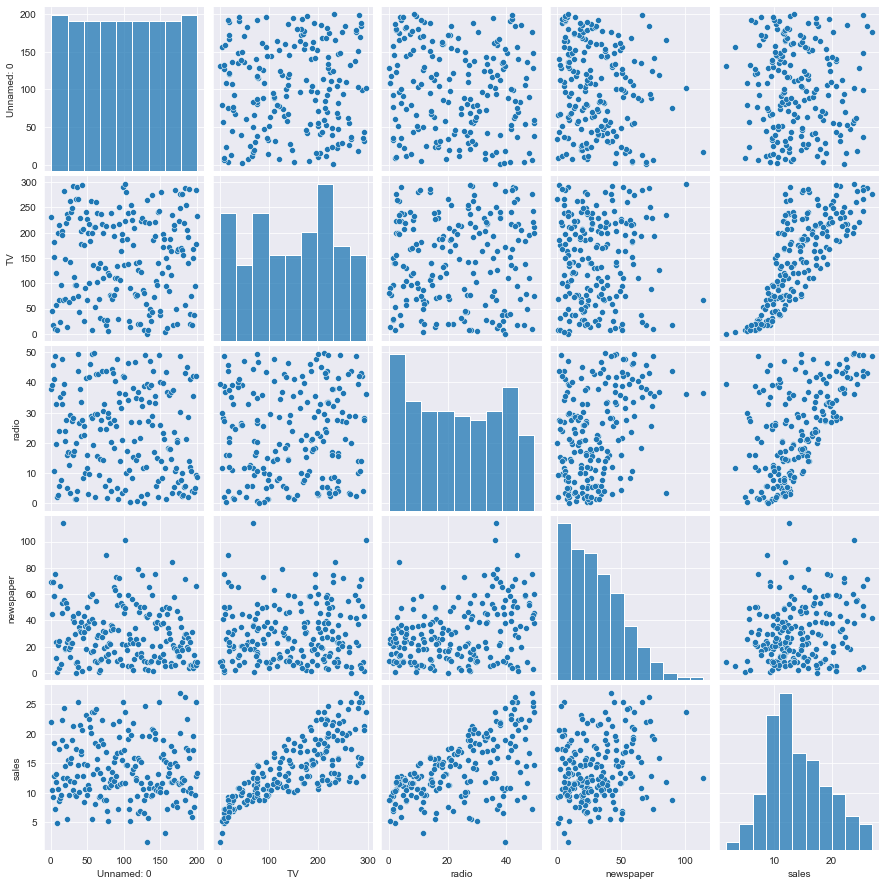

In [16]:
## Let's plot the pairplot for all the attributes together
sns.pairplot(df)

# Data Distibution

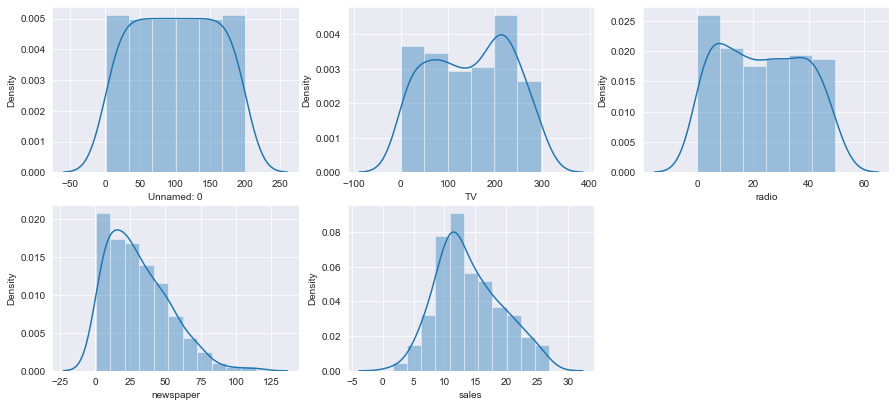

In [17]:
plt.figure(figsize=(15,14))
for index,colum in enumerate(df.keys()):
    plt.subplot(4,3,index+1)
    sns.distplot(df[colum])
    plt.xlabel(colum)
plt.show()

1- It shows that our dataset is approimately bell shaped in distribution means normally distributed.

2- Newspaper attribute is a little right skewed.

3- our target attribute is Normally distributed.

# Checking Outliers

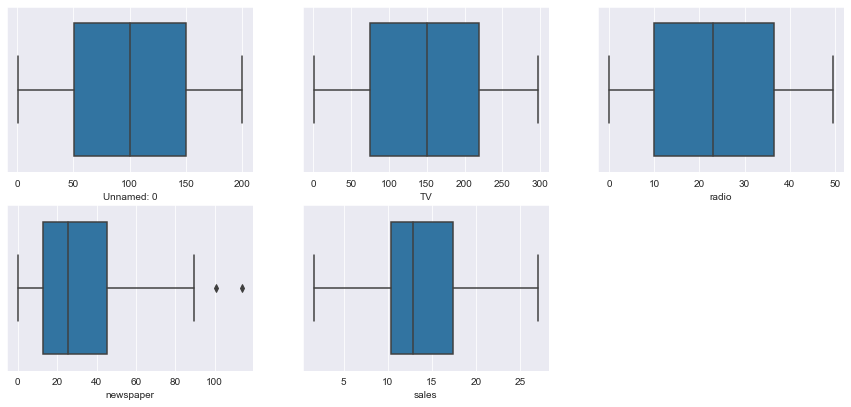

In [18]:
plt.figure(figsize=(15,14))
for index,colum in enumerate(df.keys()):
    plt.subplot(4,3,index+1)
    sns.boxplot(df[colum])
    plt.xlabel(colum)
plt.show()

only newspaper column has outliers

# Outliers removal

In [19]:
lower_limit=df['newspaper'].mean()-3*df["newspaper"].std()
upper_limit=df['newspaper'].mean()+3*df["newspaper"].std()

In [20]:
df[(df['newspaper']>upper_limit) | (df['newspaper']<lower_limit)]

,Unnamed: 0,TV,radio,newspaper,sales
16,17,67.8,36.6,114.0,12.5
101,102,296.4,36.3,100.9,23.8


these are two outliers present in newspaper column

In [21]:
df['newspaper'] = np.where(df['newspaper'] > upper_limit , df['newspaper'].mean() ,np.where(df['newspaper'] < lower_limit , df['newspaper'].mean() , df['newspaper']))

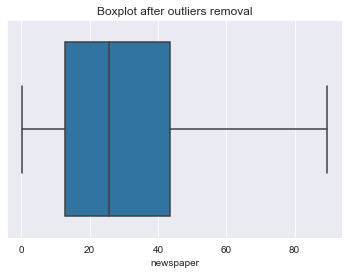

In [22]:
sns.boxplot(df['newspaper']).set_title('Boxplot after outliers removal')
plt.show()

# skewness

In [23]:
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.652166
sales         0.407571
dtype: float64

We can see that for Newspaper attribute skewness is more than .5 so we will remove this with some transformation methods.

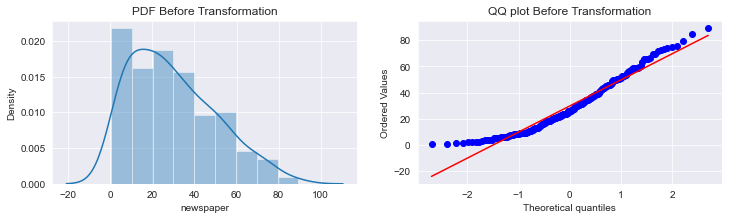

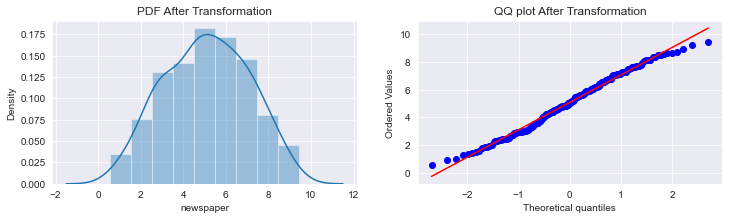

In [24]:
plt.figure(figsize=(12,3))
plt.subplot(2,3,1)
plt.subplot(1,2,1)
sns.distplot(df["newspaper"])
plt.title('PDF Before Transformation')
plt.subplot(1,2,2)
stats.probplot(df["newspaper"], dist="norm", plot=plt)
plt.title('QQ plot Before Transformation')
df['newspaper']=np.sqrt(df['newspaper'])
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
sns.distplot(df["newspaper"])
plt.title('PDF After Transformation')
plt.subplot(1,2,2)
stats.probplot(df["newspaper"], dist="norm", plot=plt)
plt.title('QQ plot After Transformation')
plt.show()

In [25]:
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper    -0.047482
sales         0.407571
dtype: float64

1- Now we can see that skewness is completly removed from our dataset.



In [26]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,8.318654,22.1
1,2,44.5,39.3,6.715653,10.4
2,3,17.2,45.9,8.324662,9.3
3,4,151.5,41.3,7.648529,18.5
4,5,180.8,10.8,7.641989,12.9


In [29]:
df.drop(['Unnamed: 0'],axis=1,inplace = True)

Dropping Unnamed: 0 column

In [30]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,8.318654,22.1
1,44.5,39.3,6.715653,10.4
2,17.2,45.9,8.324662,9.3
3,151.5,41.3,7.648529,18.5
4,180.8,10.8,7.641989,12.9
...,...,...,...,...
195,38.2,3.7,3.714835,7.6
196,94.2,4.9,2.846050,9.7
197,177.0,9.3,2.529822,12.8
198,283.6,42.0,8.136338,25.5


# Splitting Data

In [33]:
X =df.drop(['sales'],axis=1)
y = df['sales']

In [34]:
X

,TV,radio,newspaper
0,230.1,37.8,8.318654
1,44.5,39.3,6.715653
2,17.2,45.9,8.324662
3,151.5,41.3,7.648529
4,180.8,10.8,7.641989
...,...,...,...
195,38.2,3.7,3.714835
196,94.2,4.9,2.846050
197,177.0,9.3,2.529822
198,283.6,42.0,8.136338


In [35]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

# Model selection

In [54]:
def maxr2_score(pipe,x,y):
    maxr2_score1=0
    for i in range(42,100):
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=i)
        pipe.fit(X_train,y_train)
        y_pred=pipe.predict(X_test)
        r2_cscore=r2_score(y_test,y_pred)
        if r2_cscore>maxr2_score1:
            maxr2_score1=r2_cscore
            final_r=i
    print('max r2 score corresponding to',final_r,'is',maxr2_score1)
    print('cross validation score',cross_val_score(pipe,X,y,scoring='r2').mean())
    print('Standard Deviation',cross_val_score(pipe,X,y,scoring='r2').std())
    print('Training accuracy',pipe.score(X_train,y_train))
    print('Test Accuracy',pipe.score(X_test,y_test))
    print('MAE',mean_absolute_error(y_test,y_pred))
    print('MSE',mean_squared_error(y_test,y_pred))
    print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))
    

# Pipeline

# LinearRegression

In [55]:
step1 = ColumnTransformer([
     
    ('scaler',StandardScaler(),slice(0,X.shape[1]+1))
     
],remainder='passthrough')


step2 = LinearRegression()


pipe = Pipeline([
    
    ('step1',step1),
    ('step2',step2)
])

In [56]:
maxr2_score(pipe,X,y)

max r2 score corresponding to 92 is 0.9515187285698631
cross validation score 0.8874102670254015
Standard Deviation 0.03992361710168452
Training accuracy 0.8908120355537444
Test Accuracy 0.9188641460251699
MAE 1.1593522952439286
MSE 2.079844594376193
RMSE 1.442166631972947


# Lasso Regression

In [57]:
step1 = ColumnTransformer([
     
    ('scaler',StandardScaler(),slice(0,X.shape[1]+1))
     
],remainder='passthrough')


step2 = Lasso()


pipe = Pipeline([
    
    ('step1',step1),
    ('step2',step2)
])

In [58]:
maxr2_score(pipe,X,y)

max r2 score corresponding to 83 is 0.8612868208059037
cross validation score 0.8179836888629499
Standard Deviation 0.047506963295187006
Training accuracy 0.8195351164670449
Test Accuracy 0.8394020081893449
MAE 1.50604387626582
MSE 4.116784981873517
RMSE 2.0289861955847597


# ridge regression

In [59]:
step1 = ColumnTransformer([
     
    ('scaler',StandardScaler(),slice(0,X.shape[1]+1))
     
],remainder='passthrough')


step2 = Ridge()


pipe = Pipeline([
    
    ('step1',step1),
    ('step2',step2)
])

In [60]:
maxr2_score(pipe,X,y)

max r2 score corresponding to 92 is 0.9512212769916484
cross validation score 0.8874924232677787
Standard Deviation 0.0403378730759483
Training accuracy 0.8907792694474108
Test Accuracy 0.9186310820504191
MAE 1.163488674489669
MSE 2.0858189796113527
RMSE 1.4442364694229795


# Decision Tree Regressor

In [61]:
step1 = ColumnTransformer([
     
    ('scaler',StandardScaler(),slice(0,X.shape[1]+1))
     
],remainder='passthrough')


step2 = DecisionTreeRegressor()


pipe = Pipeline([
    
    ('step1',step1),
    ('step2',step2)
])

In [62]:
maxr2_score(pipe,X,y)

max r2 score corresponding to 75 is 0.9743711322118668
cross validation score 0.9561930503473531
Standard Deviation 0.00698277106775739
Training accuracy 1.0
Test Accuracy 0.935018198415392
MAE 0.8974999999999997
MSE 1.6657499999999998
RMSE 1.2906393764332467


# KNN

In [63]:
step1 = ColumnTransformer([
     
    ('scaler',StandardScaler(),slice(0,X.shape[1]+1))
     
],remainder='passthrough')


step2 = KNeighborsRegressor()


pipe = Pipeline([
    
    ('step1',step1),
    ('step2',step2)
])

In [65]:
maxr2_score(pipe,X,y)

max r2 score corresponding to 59 is 0.9638682435103711
cross validation score 0.9336853907059559
Standard Deviation 0.0291128050575576
Training accuracy 0.9514708873107421
Test Accuracy 0.9244572659075216
MAE 0.8855000000000002
MSE 1.9364699999999992
RMSE 1.3915710545998


# SVM

In [66]:
step1 = ColumnTransformer([
     
    ('scaler',StandardScaler(),slice(0,X.shape[1]+1))
     
],remainder='passthrough')


step2 = SVR()


pipe = Pipeline([
    
    ('step1',step1),
    ('step2',step2)
])

In [67]:
maxr2_score(pipe,X,y)

max r2 score corresponding to 45 is 0.9761795258887384
cross validation score 0.9052186935209271
Standard Deviation 0.05565971853466516
Training accuracy 0.9279221358221814
Test Accuracy 0.9142989230131309
MAE 0.8653802514480488
MSE 2.1968699775891016
RMSE 1.482184191519091


# Random Forest

In [68]:
step1 = ColumnTransformer([
     
    ('scaler',StandardScaler(),slice(0,X.shape[1]+1))
     
],remainder='passthrough')


step2 = RandomForestRegressor()


pipe = Pipeline([
    
    ('step1',step1),
    ('step2',step2)
])

In [69]:
maxr2_score(pipe,X,y)

max r2 score corresponding to 47 is 0.9895208287922876
cross validation score 0.9753180328472155
Standard Deviation 0.009102742298302713
Training accuracy 0.9966492859622421
Test Accuracy 0.9839253231047705
MAE 0.49262500000000065
MSE 0.41205987500000074
RMSE 0.6419189006408837


# Adaboost Regessor

In [70]:
step1 = ColumnTransformer([
     
    ('scaler',StandardScaler(),slice(0,X.shape[1]+1))
     
],remainder='passthrough')


step2 = AdaBoostRegressor()


pipe = Pipeline([
    
    ('step1',step1),
    ('step2',step2)
])

In [71]:
maxr2_score(pipe,X,y)

max r2 score corresponding to 69 is 0.9761740832613507
cross validation score 0.9530681661173981
Standard Deviation 0.011910034559132863
Training accuracy 0.9762432871399253
Test Accuracy 0.9646316694545469
MAE 0.7846148238893262
MSE 0.9066353220351984
RMSE 0.9521739977730952


# Gardient Boost Regressor

In [72]:
step1 = ColumnTransformer([
     
    ('scaler',StandardScaler(),slice(0,X.shape[1]+1))
     
],remainder='passthrough')


step2 = GradientBoostingRegressor()


pipe = Pipeline([
    
    ('step1',step1),
    ('step2',step2)
])

In [73]:
maxr2_score(pipe,X,y)

max r2 score corresponding to 69 is 0.9907805880561229
cross validation score 0.977588031951333
Standard Deviation 0.008772780268735274
Training accuracy 0.998587658192269
Test Accuracy 0.9825270173579077
MAE 0.48947504842021017
MSE 0.44790418434565743
RMSE 0.6692564413927276


it is clear that Random Forest Regressor if our best model because the difference between R_2 score and Cross validation score is minimum which shows that our Model is not overfit and best among all.

# Hyperparameter Tuning for Random Forest¶


In [76]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=48,test_size=.20)


In [77]:
step1 = ColumnTransformer([
     
    ('scaler',StandardScaler(),slice(0,X.shape[1]+1))
     
],remainder='passthrough')


step2 = RandomForestRegressor()


pipe = Pipeline([
    
    ('step1',step1),
    ('step2',step2)
])

In [80]:
param={'step2__n_estimators':[50,100,200],
       'step2__max_depth':[10,50,None],
       'step2__max_features': [1,2,3],
       'step2__bootstrap': [True, False]}

gridscv=GridSearchCV(estimator=pipe,param_grid=param,scoring='r2',n_jobs=-1)
gridscv.fit(X_train,y_train)
gridscv.best_params_

{'step2__bootstrap': True,
 'step2__max_depth': 50,
 'step2__max_features': 3,
 'step2__n_estimators': 100}

In [82]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=48,test_size=.20)

step1 = ColumnTransformer([
     
    ('scaler',StandardScaler(),slice(0,X.shape[1]+1))
     
],remainder='passthrough')


step2 = RandomForestRegressor(bootstrap=True,max_depth=50,max_features=3,n_estimators=100)


pipe = Pipeline([
    
    ('step1',step1),
    ('step2',step2)
])

In [83]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  slice(0, 4, None))])),
                ('step2', RandomForestRegressor(max_depth=50, max_features=3))])

In [84]:
y_pred = pipe.predict(X_test)

In [85]:
print('Error')
print(' Mean Absolute Error (MAE) :',mean_absolute_error(y_pred,y_test))
print('Mean Squared Error (MSE) :',mean_squared_error(y_pred,y_test))
print('Root Mean Squared Error :',np.sqrt(mean_squared_error(y_pred,y_test)))
print('R_2 score:',r2_score(y_pred,y_test))

Error
 Mean Absolute Error (MAE) : 0.4568999999999993
Mean Squared Error (MSE) : 0.3349707999999986
Root Mean Squared Error : 0.578766619631781
R_2 score: 0.9879660579038815


# saving our Model

In [98]:
import pickle

In [99]:
pickle.dump(pipe,open('Advertising_Sales_Channel_Prediction.pkl','wb'))

# Loading model

In [109]:
pic_file = pickle.load(open('Advertising_Sales_Channel_Prediction.pkl','rb'))

In [110]:
pic_file.predict(X_test)

array([15.032, 12.346, 12.378,  4.39 , 18.405,  9.783, 12.906,  5.06 ,
        6.785, 20.562,  8.575, 12.059, 10.307,  4.758, 11.888, 18.138,
       16.575, 16.218, 25.078,  8.465, 19.399, 11.18 , 14.98 , 12.097,
       24.316, 10.792, 12.843, 15.34 , 18.522, 12.152,  7.393,  9.173,
       10.838, 25.163, 13.022,  7.064, 20.228, 17.475, 12.021, 15.556])